# **Project EDA SNA  2022**


---
Kelompok 04

**Ketua Kelompok**

-   Syahel Rusfi Razaba - 11210940000048

Anggota

-   Syahrul Azka - 11210940000049
-   Riesma Ayu Chikharatti - 11210940000053

-   Raynaldi Ilham Nanda Nur Pratama - 11210940000055
-   Khoirunnisa - 11210940000068

-   Ulya Salsabila - 11210940000074

Topik yang diangkat pada analisis data eksplorasi ini ialah mengenai Piala Dunia 2022, dengan mengambil data langsung dari twitter.

**Peran Anggota**


1.   Syahel Rusfi Razaba (Preprocessing)
2.   Syahrul Azka (Visualisasi Text)
3. Riesma Ayu Chikharatti (Interpretasi Visualisasi dengan Voyant Tools LInks)
4. Raynaldi Ilham Nanda Nur Pratama (Preprocessing)
5. Khoirunnisa (Interpretasi Visualisasi dengan Voyant Tools WordTree)
6. Ulya Salsabila (Interpretasi Visualisasi dengan Voyant Tools Cirrus)












# **Preprocessing**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk
# install modul yang akan dipakai

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt

    !pip install --upgrade git+https://github.com/kevctae/twint.git
    !pip install nest_asyncio
    !pip install unidecode
    !pip install Sastrawi
    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install unidecode twython beautifulsoup4 pyLDAvis json_lines
    !pip install networkx scipy
    !pip install --upgrade tweepy
    !pip install tweet-preprocessor
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
    nltk.download('punkt')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-12-30 01:53:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-12-30 01:53:23 (78.2 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

--2022-12-30 01:53:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26207

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 485 kB 44.8 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11002 sha256=147799642b508993ddd6292d56f68d5af713f7ade32f34bd500ca205994e8ada
  Stored in directory: /root/.cache/pip/wheels/ae/58/d6/d02551a7e46a57df37e3b3422e87e4f66483155d469c8af338
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# Mengimport Modules untuk Notebook ini
import itertools, re
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import string
import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170

import twint
import nest_asyncio
import pandas as pd
from google.colab import files
# Stopwords
Sastrawi_StopWords_id = factory.get_stop_words()
print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)
'Done'

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

'Done'

In [ ]:
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
"Done"

'Done'

In [ ]:
# Mencari topik data tweet "Piala Dunia 2022"
config.Search = "Piala Dunia 2022" 
# config limit (menentukan batas tweet)
config.Limit = 15000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

data.head()

(15004, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608642688794136576,1608642688794136576,1.672365e+12,2022-12-30 01:54:38,+0000,,Father of World Cup. Akhirnya bisa main bola b...,in,[],[],...,,,,,,[],,,,
1,1608641294812991488,1608641294812991488,1.672365e+12,2022-12-30 01:49:06,+0000,,Maradona meninggal Argentina juara piala Dunia...,in,[],[],...,,,,,,[],,,,
2,1608639913678995457,1608639913678995457,1.672365e+12,2022-12-30 01:43:37,+0000,,https://t.co/WpTaI8JfJY info main bola Diinc...,in,[],[],...,,,,,,[],,,,
3,1608639517652824064,1608639517652824064,1.672365e+12,2022-12-30 01:42:02,+0000,,Mampukah Real Madrid membuka lanjutan Liga Spa...,in,[kumparanbola],[],...,,,,,,[],,,,
4,1608637019978354688,1608637019978354688,1.672364e+12,2022-12-30 01:32:07,+0000,,"Di penghujung tahun 2022, Dunia SepakBola Berd...",in,"[legends, pele]",[],...,,,,,,[],,,,


In [ ]:
# Definisi dataframe
df  = pd.DataFrame(data[['tweet']])
df

,tweet
0,Father of World Cup. Akhirnya bisa main bola b...
1,Maradona meninggal Argentina juara piala Dunia...
2,https://t.co/WpTaI8JfJY info main bola Diinc...
3,Mampukah Real Madrid membuka lanjutan Liga Spa...
4,"Di penghujung tahun 2022, Dunia SepakBola Berd..."
...,...
14999,"Link Live Streaming Piala Dunia 2022, Argentin..."
15000,Final Piala Dunia 2022 Argentina Vs Prancis Ma...
15001,"NOBAR PIALA DUNIA ""Shireen X Vanjava 5.0"" 🗓️ ..."
15002,@idextratime data dan fakta piala dunia qatar ...


In [ ]:
# Remove Username
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
df['remove_user'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df

,tweet,remove_user
0,Father of World Cup. Akhirnya bisa main bola b...,Father of World Cup. Akhirnya bisa main bola b...
1,Maradona meninggal Argentina juara piala Dunia...,Maradona meninggal Argentina juara piala Dunia...
2,https://t.co/WpTaI8JfJY info main bola Diinc...,https://t.co/WpTaI8JfJY info main bola Diinc...
3,Mampukah Real Madrid membuka lanjutan Liga Spa...,Mampukah Real Madrid membuka lanjutan Liga Spa...
4,"Di penghujung tahun 2022, Dunia SepakBola Berd...","Di penghujung tahun 2022, Dunia SepakBola Berd..."
...,...,...
14999,"Link Live Streaming Piala Dunia 2022, Argentin...","Link Live Streaming Piala Dunia 2022, Argentin..."
15000,Final Piala Dunia 2022 Argentina Vs Prancis Ma...,Final Piala Dunia 2022 Argentina Vs Prancis Ma...
15001,"NOBAR PIALA DUNIA ""Shireen X Vanjava 5.0"" 🗓️ ...","NOBAR PIALA DUNIA ""Shireen X Vanjava 5.0"" 🗓️ ..."
15002,@idextratime data dan fakta piala dunia qatar ...,data dan fakta piala dunia qatar 2022.. http...


In [ ]:
df = df[['remove_user']]
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = p.clean(docx)
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ...
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx
df['clean_tweet'] = '' # inititate kolom kosong
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_tweet'] = cleanText(post.remove_user)
    
df

15004it [19:08, 13.07it/s]


,remove_user,clean_tweet
0,Father of World Cup. Akhirnya bisa main bola b...,father world cup akhir main bola brsama marado...
1,Maradona meninggal Argentina juara piala Dunia...,maradona tinggal argentina juara piala dunia s...
2,https://t.co/WpTaI8JfJY info main bola Diinc...,info main bola incar banyak klub ayah alexis m...
3,Mampukah Real Madrid membuka lanjutan Liga Spa...,mampu real madrid buka lanjut liga spanyol usa...
4,"Di penghujung tahun 2022, Dunia SepakBola Berd...",hujung tahun dunia sepakbola duka hingga orang...
...,...,...
14999,"Link Live Streaming Piala Dunia 2022, Argentin...",link live streaming piala dunia argentina pran...
15000,Final Piala Dunia 2022 Argentina Vs Prancis Ma...,final piala dunia argentina prancis malam link...
15001,"NOBAR PIALA DUNIA ""Shireen X Vanjava 5.0"" 🗓️ ...",nobar piala dunia shireen vanjava minggu desem...
15002,data dan fakta piala dunia qatar 2022.. http...,data fakta piala dunia qatar


In [ ]:
# Remove slang
!wget -P data/ https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt
def convertToSlangword(text):
    kamus_slangword = eval(open("/content/data/combined_slang_words.txt").read()) 
    pattern = re.compile(r'\b( ' + '|'.join (kamus_slangword.keys())+r')\b') 
    content = []
    for kata in text:
        filteredSlang = pattern.sub(lambda x: kamus_slangword[x.group()],kata) 
        content.append(filteredSlang.lower())
    text = content
    return text
df.apply(convertToSlangword)
df

--2022-12-30 02:22:26--  https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21192 (21K) [text/plain]
Saving to: ‘data/combined_slang_words.txt’

combined_slang_word 100%[===================>]  20.70K  --.-KB/s    in 0.001s  

2022-12-30 02:22:26 (17.3 MB/s) - ‘data/combined_slang_words.txt’ saved [21192/21192]



,remove_user,clean_tweet
0,Father of World Cup. Akhirnya bisa main bola b...,father world cup akhir main bola brsama marado...
1,Maradona meninggal Argentina juara piala Dunia...,maradona tinggal argentina juara piala dunia s...
2,https://t.co/WpTaI8JfJY info main bola Diinc...,info main bola incar banyak klub ayah alexis m...
3,Mampukah Real Madrid membuka lanjutan Liga Spa...,mampu real madrid buka lanjut liga spanyol usa...
4,"Di penghujung tahun 2022, Dunia SepakBola Berd...",hujung tahun dunia sepakbola duka hingga orang...
...,...,...
14999,"Link Live Streaming Piala Dunia 2022, Argentin...",link live streaming piala dunia argentina pran...
15000,Final Piala Dunia 2022 Argentina Vs Prancis Ma...,final piala dunia argentina prancis malam link...
15001,"NOBAR PIALA DUNIA ""Shireen X Vanjava 5.0"" 🗓️ ...",nobar piala dunia shireen vanjava minggu desem...
15002,data dan fakta piala dunia qatar 2022.. http...,data fakta piala dunia qatar


In [ ]:
df.drop_duplicates(subset ="clean_tweet", keep = 'first', inplace = True) # Menghilangkan duplikasi data
df = df[['clean_tweet']] # Menampilkan clean tweet
df 

,clean_tweet
0,father world cup akhir main bola brsama marado...
1,maradona tinggal argentina juara piala dunia s...
2,info main bola incar banyak klub ayah alexis m...
3,mampu real madrid buka lanjut liga spanyol usa...
4,hujung tahun dunia sepakbola duka hingga orang...
...,...
14999,link live streaming piala dunia argentina pran...
15000,final piala dunia argentina prancis malam link...
15001,nobar piala dunia shireen vanjava minggu desem...
15002,data fakta piala dunia qatar


In [ ]:
# Menyimpan data csv di komputer
df.to_csv("data.csv",index=False, encoding='utf8', header=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Visualisasi dan Interpretasi**

# VIsualisasi Cirrus

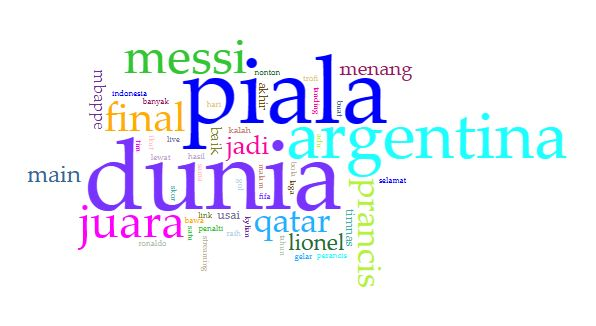


Dari hasil visualisasi kurang lebih hampir 12000 tweet dengan kata kunci “Piala Dunia 2022” dengan bentuk cirus terlihat empat kata tertulis paling besar yaitu kata “dunia(11933)”, “piala(11745)”, “argentina(6149)”, dan “juara(3676)”. Besar ukuran tersebut dipengaruhi oleh banyaknya penggunaan kata dalam tweet. Dari keempat kata tersebut mengindikasikan juara piala dunia adalah Argentina. Karena kata-kata tersebut merujuk pada kemenangan.
Kata “piala dunia” muncul lebih dari sepuluh ribu kali, hal ini cenderung terjadi karena sesuai dengan kata kunci yang diinginkan, sehingga tidak heran dua kata tersebut yang menjadi pusat obrolan tweet yang diambil. Argentina yang diperbincangkan lebih dari enam ribu kali ini menjadi topik hangat di twitter yang melonjak saat final. Hal ini memperkuat indikasi bahwa Argentina yang menjadi pemenang di piala dunia.

Perbincangan perihal Argentina, tidak lepas dengan tokoh terbaik yang berhasil mencetak gol saat final piala dunia, yaitu Messi. Kata “messi(3438)” ramai saat final piala dunia. Para pengguna tweet rata-rata memuji performa Messi di piala dunia. Kapten Argentina tersebut juga mendapatkan penghargaan sebagai pemain terbaik di piala dunia 2022. Bahkan, setelah piala dunia berakhir, Messi masih diperbincangkan karena kamar inap Messi selama piala dunia dikabarkan akan dijadikan Museum. 
Informasi perihal kamar Messi dapat ditambahkan menggunakan visualisasi wordtree, visualisai ini melengkapi informasi yang sebelumnya didapatkan di cirrus. Visualisasi wordtree digunakan untuk memperlihatkan hubungan antar kata, bisa mengeksplorasi data lebih jauh, karena banyak kata yang tidak muncul dalam visualisasi sebelumnya. 

# Visualisasi WordTree

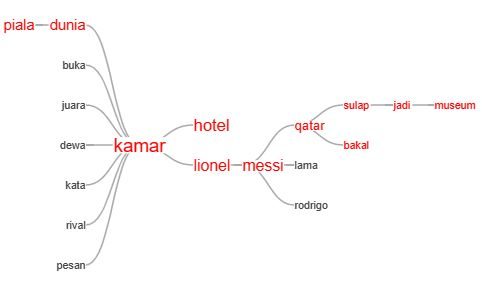

Ramai diperbincangkan perihal kamar tempat Lionel Messi menginap di Qatar akan dijadikan mini museum. Sebagaimana diketahui, Argentina berhasil menjadi juara Piala Dunia 2022. Gelar ketiga diraih setelah mereka menumpas Timnas Prancis di Stadion Lusail. Hal ini dilakukan sebagai penghormatan atas keberhasilan Messi menjadi pemain terbaik dan mengantarkan Argentina sebagai juara piala dunia. Museum tersebut akan berisi foto-foto perjuangan Messi serta alat-alat yang pernah digunakan oleh Messi. 
Sebelumnya, penghormatan untuk Lionel Messi diberikan secara jelas oleh Emir Qatar Sheikh Tamim bin Hamad Al Thani dalam bentuk penyematan jubah hitam berkelir emas yang bernama “Bisht”. Dengan adanya wacana ini, Qatar menunjukkan penghargaan penuh terhadap perjuangan “La Pulga” sebutan untuk Lionel Messi.
Kata yang menarik selanjutnya adalah “final(3215)”, “prancis(2267)”, dan “mbappe(997)”. Tiga kata tersebut diperbincangkan di twitter karena pada final piala dunia, Argentina bermain melawan Prancis dimana Mbappe merupakan pencetak gol untuk Prancis. Ada beberapa tweet yang menyinggung hubungan Mbappe dengan Messi, mereka khawatir hubungan itu akan pecah setelah piala dunia atas kekalahan Mbappe dan kemenangan Messi.
Kata “qatar” sering disandingkan dengan kata “piala dunia” dikarenakan Qatar merupakan tuan rumah. Selain menjadi tuan rumah, Qatar diperbincangkan di twitter karena stadion Qatar dianggap mewah dan canggih. Selain itu, kebijakan Qatar yang berencana menjadikan kamar Messi sebagai museum juga menjadi alasan kata “qatar” banyak digunakan dalam tweet.


# Visualisasi Links

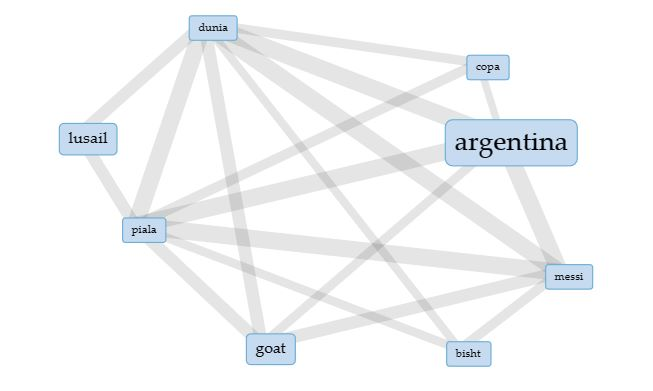

Berdasarkan visualisasi wordlink, ditemukan kata-kata asing seperti “lusail (205)”, “goat (191)”, “copa (94)”, dan “bisht (87)”. Dapat dilihat dari visualisasi dengan bentuk link, kata-kata tersebut memiliki  keterkaitan dengan piala dunia akan tetapi tidak terlalu erat. Berdasarkan data, setelah ditelusuri, yang pertama terdapat kata “lusail”. Lusail merupakan salah satu nama kota di Qatar. Qatar sebagai tuan rumah Piala Dunia 2022 menyediakan delapan stadion untuk menggelar seluruh pertandingan. Salah satunya adalah Lusail Iconic Stadium, yang terletak di kota Lusail, Qatar. Yang kedua “goat”, kata “goat” merupakan status Greatest of All Time yang resmi disandang Lionel Messi karena ia berhasil membawa Argentina menjuarai Piala Dunia 2022. 
Yang ketiga terdapat kata “copa”. Kata “copa” diperbincangkan karena keberhasilan Argentina dalam kejuaraan dapat dibilang berturut-turut, mengingat Argentina juga memenangi Copa America pada tahun 2021 lalu. Ada catatan unik dari keberhasilan Argentina memenangi 2 trofi tersebut. Mereka meraihnya dengan mengalahkan juara bertahan di partai final, seperti Brazil dan Prancis. Salah satu aktor penting dibalik sukses Argentina yaitu sang kiper Emiliano Martinez juga turut andil dalam Copa America 2021. Dan yang terakhir terdapat kata “bisht”. Bisht adalah jubah hitam. Tuan rumah Piala Dunia 2022 memberikan jubah Bisht kepada Lionel Messi sesaat sebelum penyerahan trofi yang kemudian menjadi kontroversi. Pemberian Bisht kepada Messi menuai kecaman, karena peraturan FIFA melarang adanya atribut lain selain jersey di setiap acara ceremony. Pakaian tradisional yang dikenakan di wilayah tersebut biasanya untuk acara dan perayaan khusus itu dinilai menutupi jersey timnas Argentina yang dipakai Messi.


# Visualisasi WordTree

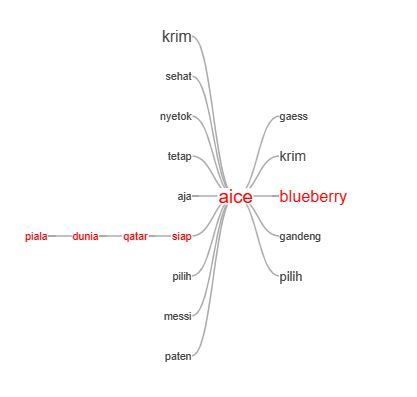

Salah satu efek dari piala dunia yang dirasakan oleh pihak lain salah satunya perihal “aice”. Kabar atau informasi produk es krim “Aice” yang menjadi sponsor untuk Piala Dunia Qatar 2022 juga ikut ramai diperbincangkan, sebab dalam beberapa tahun terakhir, “Aice” aktif dalam mengekspresikan dukungannya terhadap kegiatan olahraga. Saat piala dunia, mereka menunjukkan konsistensinya terhadap dunia olahraga, dengan menjadi sponsor resmi Piala Dunia Qatar 2022. Momen ini dimanfaatkan  untuk memajukan sepak bola Indonesia. Selain untuk menunjukkan konsistensinya, hal ini merupakan bagian dari personal branding yang dilakukan oleh perusahaan “Aice”. Dengan menjadi sponsor piala dunia, es krim “Aice” dapat dikenal oleh lebih banyak masyarakat.